In [3]:
import requests
from PIL import Image
from io import BytesIO
import tensorflow as tf
#from keras_preprocessing.image import load_img, img_to_array, array_to_img 
import numpy as np 
import matplotlib.pyplot as plt 


def predict_url(URL,model_weight):
    """Parameter:
    URL=URL of image
    model_weight = path to file of train neural network weight
    """
    # URL of the image
    image_url = URL
    # Fetch the image from the web
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
    labels = {v:k for k,v in labels_inv.items()}
    labels

    # Preprocess the image
    image = image.resize((224, 224))  # Resize the image to match the model's input size
    img = np.array(image)
    model = tf.keras.models.load_model(model_weight)


    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-6:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

1/1 [==============================] - 0s 395ms/step
Cargo Ship : 100.00 %
Carrier Ship : 0.00 %
Tankers Ship : 0.00 %
Cruise Ship : 0.00 %
Military Ship : 0.00 %


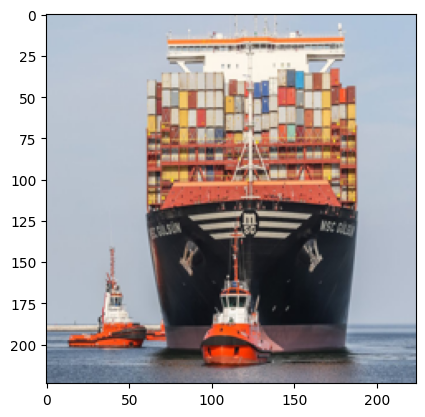

In [5]:
predict_url('https://images.wsj.net/im-117054?width=1280&size=1.77777778','./model_VGG16_2.h5')